Goal => Find a pattern in the top influencer's stats

Note => I think the problem is that the dataset is not a good one for Clustering

In [ ]:
### Data Preprocessing
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("top_insta_influencers_data.csv")

# Clear non numerical columns channel_info - country
dataframe = dataframe.drop(["channel_info", "country"], axis = 1)

# Individually adjust the necessary columns
for i in range(len(dataframe)):
  
  # Remove % and change the value to an int
  rate = dataframe["60_day_eng_rate"][i]
  dataframe.loc[i, "60_day_eng_rate"] = float(rate[:-1])

  # Change b, m, and k to numerical numbers: billion, million and thousand
  post = dataframe["posts"][i]
  follower = dataframe["followers"][i]
  post_like = dataframe["new_post_avg_like"][i]
  likes = dataframe["total_likes"][i]
  average_likes = dataframe["avg_likes"][i]

  # Adjust posts column
  if post[-1] == "b":  
    dataframe.loc[i, "posts"] = int(float(post[:-1]) * 1000000000)
  elif post[-1] == "m":
     dataframe.loc[i, "posts"] = int(float(post[:-1]) * 1000000)
  elif post[-1] == "k":
     dataframe.loc[i, "posts"] = int(float(post[:-1]) * 1000)
  
  # Adjust followers column
  if follower[-1] == "b":  
    dataframe.loc[i, "followers"] = int(float(follower[:-1]) * 1000000000)
  elif follower[-1] == "m":
     dataframe.loc[i, "followers"] = int(float(follower[:-1]) * 1000000)
  elif follower[-1] == "k":
     dataframe.loc[i, "followers"] = int(float(follower[:-1]) * 1000)
  
  # Adjust new post avg like column
  if post_like[-1] == "b":  
    dataframe.loc[i, "new_post_avg_like"] = int(float(post_like[:-1]) * 1000000000)
  elif post_like[-1] == "m":
     dataframe.loc[i, "new_post_avg_like"] = int(float(post_like[:-1]) * 1000000)
  elif post_like[-1] == "k":
     dataframe.loc[i, "new_post_avg_like"] = int(float(post_like[:-1]) * 1000)
  
  # Adjust total likes column 
  if likes[-1] == "b":  
    dataframe.loc[i, "total_likes"] = int(float(likes[:-1]) * 1000000000)
  elif likes[-1] == "m":
     dataframe.loc[i, "total_likes"] = int(float(likes[:-1]) * 1000000)
  elif likes[-1] == "k":
     dataframe.loc[i, "total_likes"] = int(float(likes[:-1]) * 1000)

  # Adjust average likes column 
  if average_likes[-1] == "b":  
    dataframe.loc[i, "avg_likes"] = int(float(average_likes[:-1]) * 1000000000)
  elif average_likes[-1] == "m":
     dataframe.loc[i, "avg_likes"] = int(float(average_likes[:-1]) * 1000000)
  elif average_likes[-1] == "k":
     dataframe.loc[i, "avg_likes"] = int(float(average_likes[:-1]) * 1000)

# Change the order of the ranking column. I want the number one influencer to be biased as better than the others
for i in range(len(dataframe)):
   rank = dataframe["rank"][i]
   dataframe.loc[i, "rank"] = len(dataframe) - i # Give rank number 1 the value 199, rank number 2 the value 198 ...

features = dataframe.values # no feature scaling
dataframe

In [30]:
### Helper Functions
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Use Dendrogram to find the cluster count
def build_dendrogram(list_of_features):
  # Build Dendrogram
  plt.figure(figsize = (7, 5)) 
  linkage = shc.linkage( list_of_features, method = 'ward' )
  shc.dendrogram( linkage )
  plt.title("Dendrogram")
  plt.xlabel("Data Points")
  plt.ylabel("Euclidean Distance")
  plt.show()

def build_hierarchical_model(n_clusters, list_of_features, x_column, y_column, x_label, y_label):
  # Build Hierarchichal Cluster Model
  hierarchical_cluster = AgglomerativeClustering( n_clusters = n_clusters, linkage = 'ward' )
  class_label = hierarchical_cluster.fit_predict( list_of_features )

  # Visualize all the clusters
  colors = ['red', 'blue', 'green', 'cyan', 'orange']
  plt.figure(figsize = ( 15, 3 ))
  for i in range(n_clusters):
    plt.scatter( list_of_features[class_label == i ,x_column], list_of_features[class_label == i, y_column], s  = 50, c = colors[i], label = f"Cluster {i}")
  plt.title("Clusters")
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()

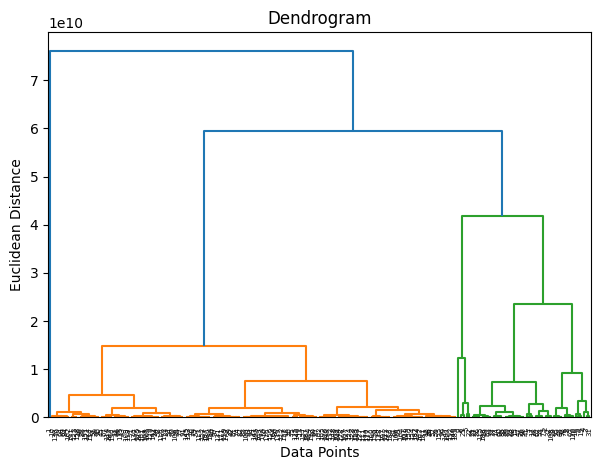

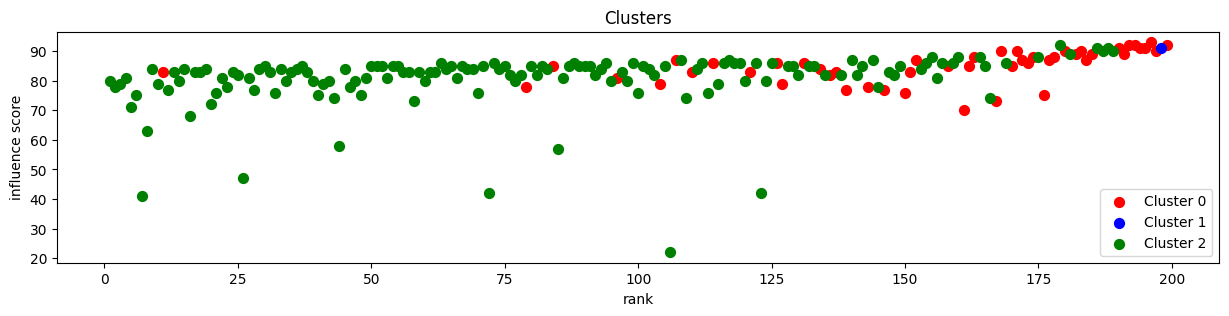

In [31]:
# ['rank', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
build_dendrogram(features)
build_hierarchical_model( n_clusters = 3, list_of_features = features, x_column = 0 , y_column =  1, x_label = 'rank' , y_label = 'influence score')

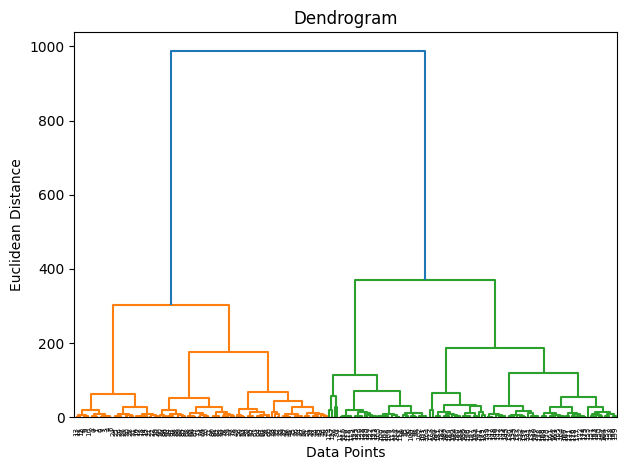

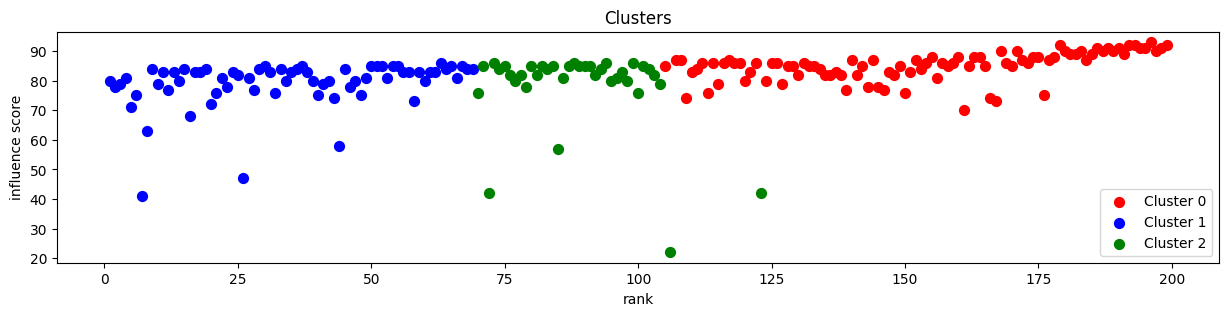

In [33]:
# ['rank', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
build_dendrogram(features[:, [0, 1]])
build_hierarchical_model( n_clusters = 3, list_of_features = features[:, [0, 1]], x_column = 0 , y_column =  1, x_label = 'rank' , y_label = 'influence score')

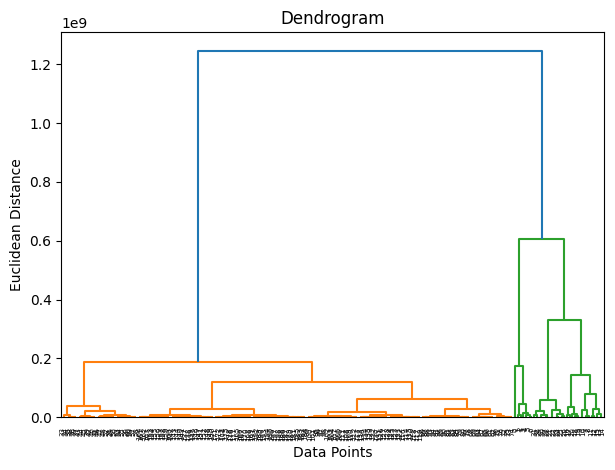

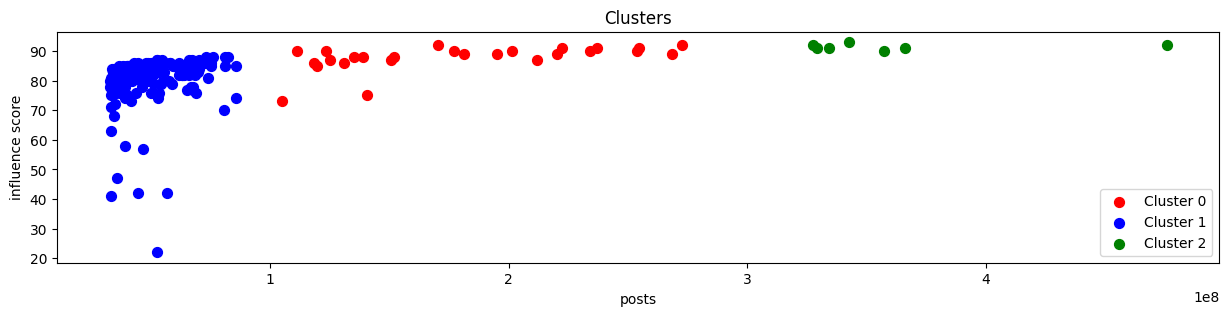

In [34]:
# ['rank', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
build_dendrogram(features[:, [3, 1]])
build_hierarchical_model( n_clusters = 3, list_of_features = features[:, [3, 1]], x_column = 0 , y_column =  1, x_label = 'posts' , y_label = 'influence score')